In [1]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [2]:
m = mp.Model()

A = m.add_var(name='Tipo 1', var_type=mp.CONTINUOUS, lb=0)
B = m.add_var(name='Tipo 2', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(8 * A + 5 * B)

m += A * 2 + B <= 400
m += A <= 150
m += B <= 200

m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 1800
Clp0000I Optimal - objective value 1800
Clp0000I Optimal - objective value 1800
Coin0511I After Postsolve, objective 1800, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1800 - 0 iterations time 0.002, Presolve 0.00


<OptimizationStatus.OPTIMAL: 0>

In [3]:
print(f"Produção de chapeu do Tipo 1: {A.x:.4f}")
print(f"Produção de chapeu do Tipo 2: {B.x:.4f}")
print(f"Max return: {m.objective_value}")

Produção de chapeu do Tipo 1: 100.0000
Produção de chapeu do Tipo 2: 200.0000
Max return: 1800.0


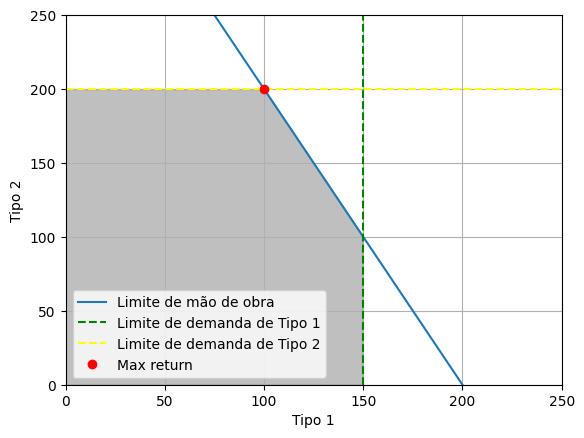

In [11]:
x = np.linspace(0, 250, 250)

r1 = 400 - 2 * x
plt.plot(x, r1, label="Limite de mão de obra")

r2 = 150
plt.axvline(r2, color='green', linestyle='--', label="Limite de demanda de Tipo 1")

r3 = 200
plt.axhline(r3, color='yellow', linestyle='--', label="Limite de demanda de Tipo 2")

plt.xlim(0, 250)
plt.ylim(0, 250)

plt.xlabel("Tipo 1")
plt.ylabel("Tipo 2")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(r1, r3), where=(x <= r2), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()